# Data loading

In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(predict_students_dropout_and_academic_success.data.features)
y =pd.DataFrame(predict_students_dropout_and_academic_success.data.targets) 
  
X.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


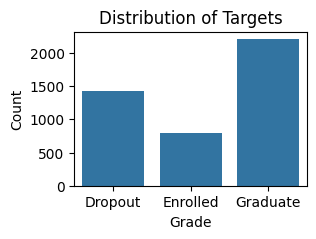

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,2))
sns.countplot(data=y, x='Target', order=y['Target'].sort_values().unique())
plt.title('Distribution of Targets')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [ ]:
X.isnull().sum(), y.isnull().sum()

(Marital Status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance                        0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                           

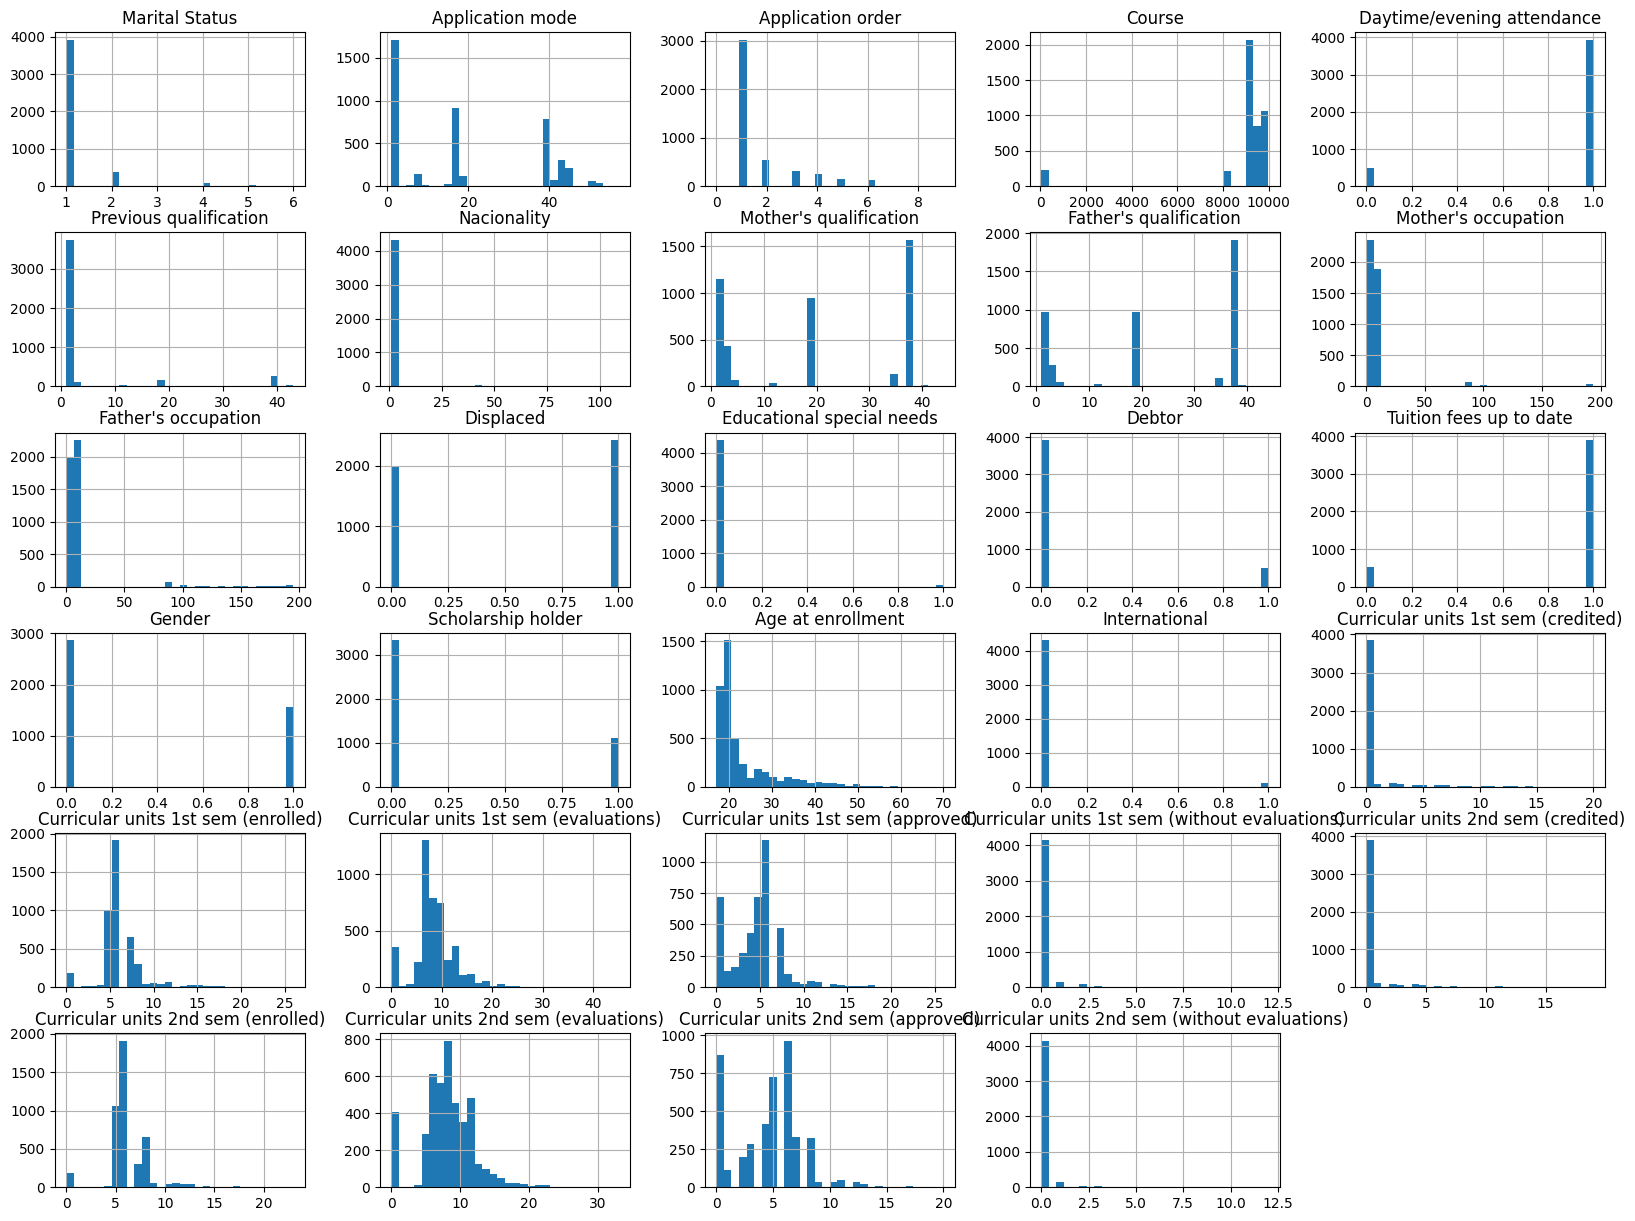

In [ ]:
from matplotlib import pyplot as plt

integer_cols = X.select_dtypes(include=['int64']).columns

X[integer_cols].hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(3539, 885)

In [ ]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# 

# Training without Preprocessing

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import time

# Initialize models
svm_model = SVC(random_state=42)
naive_bayes_model = GaussianNB()
random_forest_model = RandomForestClassifier(random_state=42)

# Timers for holdout method training
start_time_svm = time.time()
svm_model.fit(X_train, y_train)
time_svm_holdout = time.time() - start_time_svm

start_time_naive_bayes = time.time()
naive_bayes_model.fit(X_train, y_train)
time_naive_bayes_holdout = time.time() - start_time_naive_bayes

start_time_random_forest = time.time()
random_forest_model.fit(X_train, y_train)
time_random_forest_holdout = time.time() - start_time_random_forest

# Predictions
svm_predictions = svm_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Accuracy and F1 scores for holdout method
svm_accuracy_holdout = accuracy_score(y_test, svm_predictions)
naive_bayes_accuracy_holdout = accuracy_score(y_test, naive_bayes_predictions)
random_forest_accuracy_holdout = accuracy_score(y_test, random_forest_predictions)

svm_f1_holdout = f1_score(y_test, svm_predictions, average='macro')
naive_bayes_f1_holdout = f1_score(y_test, naive_bayes_predictions, average='macro')
random_forest_f1_holdout = f1_score(y_test, random_forest_predictions, average='macro')

# Timers and scores for cross-validation
start_time_svm_cv = time.time()
svm_accuracy_cv = cross_val_score(svm_model,X_train , y_train, cv=5, scoring='accuracy').mean()
time_svm_cv = time.time() - start_time_svm_cv

start_time_naive_bayes_cv = time.time()
naive_bayes_accuracy_cv = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy').mean()
time_naive_bayes_cv = time.time() - start_time_naive_bayes_cv

start_time_random_forest_cv = time.time()
random_forest_accuracy_cv = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy').mean()
time_random_forest_cv = time.time() - start_time_random_forest_cv

# F1 scores for cross-validation
svm_f1_cv = cross_val_score(svm_model,X_train , y_train, cv=5, scoring='f1_macro').mean()
naive_bayes_f1_cv = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='f1_macro').mean()
random_forest_f1_cv = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='f1_macro').mean()

print("svm_accuracy_holdout without preprocessing", svm_accuracy_holdout)
print("svm_f1_holdout without preprocessing", svm_f1_holdout)
print("svm training time (holdout): {:.2f}s".format(time_svm_holdout))
print("svm cross-validation time: {:.2f}s".format(time_svm_cv))

print("naive_bayes_accuracy_holdout without preprocessing", naive_bayes_accuracy_holdout)
print("naive_bayes_f1_holdout without preprocessing", naive_bayes_f1_holdout)
print("naive_bayes training time (holdout): {:.2f}s".format(time_naive_bayes_holdout))
print("naive_bayes cross-validation time: {:.2f}s".format(time_naive_bayes_cv))

print ("random_forest_accuracy_holdout without preprocessing", random_forest_accuracy_holdout)
print("random_forest_f1_holdout without preprocessing", random_forest_f1_holdout)
print("random_forest training time (holdout): {:.2f}s".format(time_random_forest_holdout))
print("random_forest cross-validation time: {:.2f}s".format(time_random_forest_cv))

print("svm_accuracy_cv without preprocessing", svm_accuracy_cv)
print("svm_f1_cv without preprocessing", svm_f1_cv)
print("naive_bayes_accuracy_cv without preprocessing", naive_bayes_accuracy_cv)
print("naive_bayes_f1_cv without preprocessing", naive_bayes_f1_cv)
print("random_forest_accuracy_cv without preprocessing", random_forest_accuracy_cv)
print("random_forest_f1_cv without preprocessing", random_forest_f1_cv)

svm_accuracy_holdout without preprocessing 0.47231638418079097
svm_f1_holdout without preprocessing 0.21386543873113328
svm training time (holdout): 1.61s
svm cross-validation time: 5.91s
naive_bayes_accuracy_holdout without preprocessing 0.6994350282485876
naive_bayes_f1_holdout without preprocessing 0.611267482441392
naive_bayes training time (holdout): 0.01s
naive_bayes cross-validation time: 0.10s
random_forest_accuracy_holdout without preprocessing 0.7604519774011299
random_forest_f1_holdout without preprocessing 0.6698912843191449
random_forest training time (holdout): 1.16s
random_forest cross-validation time: 5.27s
svm_accuracy_cv without preprocessing 0.5012709866628309
svm_f1_cv without preprocessing 0.229015710051996
naive_bayes_accuracy_cv without preprocessing 0.6886138613861386
naive_bayes_f1_cv without preprocessing 0.5999468165311528
random_forest_accuracy_cv without preprocessing 0.7702774514739611
random_forest_f1_cv without preprocessing 0.6873899797876538


# Training with preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import cross_val_score

# Create pipelines for each model with preprocessing
svm = make_pipeline(StandardScaler(), SVC(random_state=42))
naive_bayes = make_pipeline(StandardScaler(), GaussianNB())
random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

# Timing and training models with holdout method using pipelines
svm_start_time = time.time()
svm.fit(X_train, y_train)
svm_training_time = time.time() - svm_start_time

naive_bayes_start_time = time.time()
naive_bayes.fit(X_train, y_train)
naive_bayes_training_time = time.time() - naive_bayes_start_time

random_forest_start_time = time.time()
random_forest.fit(X_train, y_train)
random_forest_training_time = time.time() - random_forest_start_time

# Predictions
svm_predictions = svm.predict(X_test)
naive_bayes_predictions = naive_bayes.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Accuracy scores for holdout method
svm_accuracy_holdout = accuracy_score(y_test, svm_predictions)
naive_bayes_accuracy_holdout = accuracy_score(y_test, naive_bayes_predictions)
random_forest_accuracy_holdout = accuracy_score(y_test, random_forest_predictions)

# F1 scores for holdout method
svm_f1_score_holdout = f1_score(y_test, svm_predictions, average='macro')
naive_bayes_f1_score_holdout = f1_score(y_test, naive_bayes_predictions, average='macro')
random_forest_f1_score_holdout = f1_score(y_test, random_forest_predictions, average='macro')

# Timing cross-validation and getting scores
svm_cv_start_time = time.time()
svm_accuracy_cv = cross_val_score(svm, X_train, y_train, cv=5).mean()
svm_f1_score_cv = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_macro').mean()
svm_cv_training_time = time.time() - svm_cv_start_time

naive_bayes_cv_start_time = time.time()
naive_bayes_accuracy_cv = cross_val_score(naive_bayes, X_train, y_train, cv=5).mean()
naive_bayes_f1_score_cv = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='f1_macro').mean()
naive_bayes_cv_training_time = time.time() - naive_bayes_cv_start_time

random_forest_cv_start_time = time.time()
random_forest_accuracy_cv = cross_val_score(random_forest, X_train, y_train, cv=5).mean()
random_forest_f1_score_cv = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='f1_macro').mean()
random_forest_cv_training_time = time.time() - random_forest_cv_start_time

# Output results
print("svm_accuracy_holdout with preprocessing", svm_accuracy_holdout)
print("svm_f1_score_holdout with preprocessing", svm_f1_score_holdout)
print("svm_training_time", svm_training_time)

print("naive_bayes_accuracy_holdout with preprocessing", naive_bayes_accuracy_holdout)
print("naive_bayes_f1_score_holdout with preprocessing", naive_bayes_f1_score_holdout)
print("naive_bayes_training_time", naive_bayes_training_time)

print("random_forest_accuracy_holdout with preprocessing", random_forest_accuracy_holdout)
print("random_forest_f1_score_holdout with preprocessing", random_forest_f1_score_holdout)
print("random_forest_training_time", random_forest_training_time)

print("svm_accuracy_cv with preprocessing", svm_accuracy_cv)
print("svm_f1_score_cv with preprocessing", svm_f1_score_cv)
print("svm_cv_training_time", svm_cv_training_time)

print("naive_bayes_accuracy_cv with preprocessing", naive_bayes_accuracy_cv)
print("naive_bayes_f1_score_cv with preprocessing", naive_bayes_f1_score_cv)
print("naive_bayes_cv_training_time", naive_bayes_cv_training_time)

print("random_forest_accuracy_cv with preprocessing", random_forest_accuracy_cv)
print("random_forest_f1_score_cv with preprocessing", random_forest_f1_score_cv)
print("random_forest_cv_training_time", random_forest_cv_training_time)

svm_accuracy_holdout with preprocessing 0.7581920903954802
svm_f1_score_holdout with preprocessing 0.6715304349547336
svm_training_time 1.1436426639556885
naive_bayes_accuracy_holdout with preprocessing 0.6926553672316385
naive_bayes_f1_score_holdout with preprocessing 0.6026688557866123
naive_bayes_training_time 0.05847764015197754
random_forest_accuracy_holdout with preprocessing 0.7615819209039548
random_forest_f1_score_holdout with preprocessing 0.6725896344515365
random_forest_training_time 1.133331537246704
svm_accuracy_cv with preprocessing 0.7612327092273393
svm_f1_score_cv with preprocessing 0.6777241773029223
svm_cv_training_time 9.927085399627686
naive_bayes_accuracy_cv with preprocessing 0.6860694907263123
naive_bayes_f1_score_cv with preprocessing 0.5961404870603028
naive_bayes_cv_training_time 0.29673123359680176
random_forest_accuracy_cv with preprocessing 0.7702778510296551
random_forest_f1_score_cv with preprocessing 0.6883661213638026
random_forest_cv_training_time 10

# Using grid-search to improve the models 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score
import numpy as np

# Define parameter grids for each model
svm_params = {'svc__C': [1, 10], 'svc__gamma': [0.001, 0.01, 0.1, 1]}
naive_bayes_params = {'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)}
random_forest_params = {'randomforestclassifier__n_estimators': [100, 200], 'randomforestclassifier__max_depth': [None, 10,]}

# Grid search for SVM
svm_grid_search = GridSearchCV(svm, svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Grid search for Naive Bayes
naive_bayes_grid_search = GridSearchCV(naive_bayes, naive_bayes_params, cv=5)
naive_bayes_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
random_forest_grid_search = GridSearchCV(random_forest, random_forest_params, cv=5)
random_forest_grid_search.fit(X_train, y_train)

# Best models
best_svm_model = svm_grid_search.best_estimator_
best_naive_bayes_model = naive_bayes_grid_search.best_estimator_
best_random_forest_model = random_forest_grid_search.best_estimator_

# Print best parameters for each model
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best parameters for Naive Bayes:", naive_bayes_grid_search.best_params_)
print("Best parameters for Random Forest:", random_forest_grid_search.best_params_)

# Holdout predictions
svm_predictions_holdout = best_svm_model.predict(X_test)
naive_bayes_predictions_holdout = best_naive_bayes_model.predict(X_test)
random_forest_predictions_holdout = best_random_forest_model.predict(X_test)

# Confusion matrix for holdout method
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions_holdout))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_predictions_holdout))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions_holdout))

# Calculate metrics for holdout
print("Svm Holdout Accuracy:", accuracy_score(y_test, svm_predictions_holdout))
print("Svm Holdout F1 Score:", f1_score(y_test, svm_predictions_holdout, average='macro'))
print("Naive Bayes Holdout Accuracy:", accuracy_score(y_test, naive_bayes_predictions_holdout))
print("Naive Bayes Holdout F1 Score:", f1_score(y_test, naive_bayes_predictions_holdout, average='macro'))
print("Random Forest Holdout Accuracy:", accuracy_score(y_test, random_forest_predictions_holdout))
print("Random Forest Holdout F1 Score:", f1_score(y_test, random_forest_predictions_holdout, average='macro'))

# Cross-validation predictions and f1 scores
svm_predictions_cv = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_f1_cv = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='f1_macro')
naive_bayes_predictions_cv = cross_val_score(best_naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy')
naive_bayes_f1_cv = cross_val_score(best_naive_bayes_model, X_train, y_train, cv=5, scoring='f1_macro')
random_forest_predictions_cv = cross_val_score(best_random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
random_forest_f1_cv = cross_val_score(best_random_forest_model, X_train, y_train, cv=5, scoring='f1_macro')

# Calculate metrics for cross-validation
print("Svm Cross-Validation Accuracy:", svm_predictions_cv.mean())
print("Svm Cross-Validation F1 Score:", svm_f1_cv.mean())
print("Naive Bayes Cross-Validation Accuracy:", naive_bayes_predictions_cv.mean())
print("Naive Bayes Cross-Validation F1 Score:", naive_bayes_f1_cv.mean())
print("Random Forest Cross-Validation Accuracy:", random_forest_predictions_cv.mean())
print("Random Forest Cross-Validation F1 Score:", random_forest_f1_cv.mean())

Best parameters for SVM: {'svc__C': 10, 'svc__gamma': 0.01}
Best parameters for Naive Bayes: {'gaussiannb__var_smoothing': 0.3511191734215131}
Best parameters for Random Forest: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
SVM Confusion Matrix:
 [[237  37  42]
 [ 26  56  69]
 [ 10  26 382]]
Naive Bayes Confusion Matrix:
 [[203  40  73]
 [ 24  38  89]
 [ 20  28 370]]
Random Forest Confusion Matrix:
 [[239  25  52]
 [ 38  43  70]
 [  9  13 396]]
Svm Holdout Accuracy: 0.7627118644067796
Svm Holdout F1 Score: 0.6860691644153788
Naive Bayes Holdout Accuracy: 0.6903954802259887
Naive Bayes Holdout F1 Score: 0.5986013266989896
Random Forest Holdout Accuracy: 0.7661016949152543
Random Forest Holdout F1 Score: 0.6702878116270257
Svm Cross-Validation Accuracy: 0.7708432223367616
Svm Cross-Validation F1 Score: 0.7003266264051381
Naive Bayes Cross-Validation Accuracy: 0.6886146604975267
Naive Bayes Cross-Validation F1 Score: 0.5943526380894675
Random Fores

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ede9c305-40ce-4946-a04c-086638645822' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>